# Fashion MNIST Classification Assignment

In this project, you will train a Convolutional Neural Network to recognize images from fashion MNIST. You will be Marked on creating the dataset object and getting at least 85% accuracy on the validation data . You can open the lab in the next section. Follow the instructions, take a screen shot of you results and submit.

Usefull links:

http://www.eamonfleming.com/projects/fashion-mnist.html

https://www.kaggle.com/pankajj/fashion-mnist-with-pytorch-93-accuracy

https://www.kaggle.com/tinydman/fashion-mnist-with-pytorch

https://www.marktechpost.com/2019/07/30/introduction-to-image-classification-using-pytorch-to-classify-fashionmnist-dataset/

https://github.com/pranay414/Fashion-MNIST-Pytorch

https://towardsdatascience.com/build-a-fashion-mnist-cnn-pytorch-style-efb297e22582

    

Import libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

Load fashion-MNIST, create training and test sets and transform to tensors:

In [3]:
train_set = torchvision.datasets.FashionMNIST(
    "./data", 
    download=True, 
    transform=transforms.Compose([transforms.ToTensor()])
    )
test_set = torchvision.datasets.FashionMNIST(
    "./data", 
    download=True, 
    train=False, 
    transform=transforms.Compose([transforms.ToTensor()])
    ) 

Make data batches:

In [4]:
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=100)

Build a convolutinal neural network (CNN):

In [5]:
class FashCNN(nn.Module):
    
    def __init__(self):
        super(FashCNN, self).__init__()
        
        #The 1st sequential layer: 
        self.layer1 = nn.Sequential(
            #convolutional layer: input 28x28x3, output 28x28x32, kernel size 3, padding 1, stride 1
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            #batch normalization layer
            nn.BatchNorm2d(32),
            #activation function ReLU
            nn.ReLU(),
            #max polling layer: input 28x28x32, output 14x14x32, kernel size 2, stride 2
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        #The 2nd sequential layer:
        self.layer2 = nn.Sequential(
            #convolutional layer: input 14x14x32, output 12x12x64, kernel size 3, stride 1
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            #batch normalization layer
            nn.BatchNorm2d(64),
            #activation function ReLU
            nn.ReLU(),
            #max polling layer: input 12x12x64, output 6x6x64, kernel size 2, stride 1
            nn.MaxPool2d(2)
        )
        #fully connected layer 
        self.fc1 = nn.Linear(in_features=2304, out_features=600) # 6*6*64
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10) #10 outpots are ten classes of clothes
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        
        return out



Create a model:

In [6]:
model = FashCNN()

Define the loss function and set optimizer:

In [7]:
error = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

FashCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


Train model:

In [8]:
num_epochs = 5
count = 0

# Loss value list
loss_list = []
# Iteration list
iter_list = []
# Accuracy value list
acc_list = []
# Epoch list
epoch_list = []
# Prediction list
predictions_list = []
# Label list
labels_list = []

for epoch in range(num_epochs):
    #print('Epoch: #{}'.format(epoch))
    #print("Epoch: {}, Iteration: {}, Loss: {}, Accuracy: {}%".format(epoch, count, loss.data, accuracy))
    for images_tr, labels_tr in train_loader:
        # Forward propagiton
        outputs = model(images_tr)
        loss = error(outputs, labels_tr)
        # Initialize a gradient as 0 
        optimizer.zero_grad()
        # Propagate the error backward
        loss.backward()
        # Optimize the parameters
        optimizer.step()
        count += 1
    
    # Test the model    
    total = 0
    correct = 0
        
    for images_ts, labels_ts in test_loader:
        labels_list.append(labels_ts)
        outputs = model(images_ts)
       
        predictions = torch.max(outputs, 1)[1]
        predictions_list.append(predictions)
        correct += (predictions == labels_ts).sum()
            
        total += len(labels_ts)
            
    accuracy = correct * 100 / total
    loss_list.append(loss.data)
    iter_list.append(count)
    acc_list.append(accuracy)
    print("Epoch: {}, Iteration: {}, Loss: {}, Accuracy: {}%".format(epoch + 1, count, loss.data, accuracy))


Epoch: 1, Iteration: 600, Loss: 0.2849252223968506, Accuracy: 87%
Epoch: 2, Iteration: 1200, Loss: 0.24384941160678864, Accuracy: 87%
Epoch: 3, Iteration: 1800, Loss: 0.196414053440094, Accuracy: 89%
Epoch: 4, Iteration: 2400, Loss: 0.19214044511318207, Accuracy: 90%
Epoch: 5, Iteration: 3000, Loss: 0.18706007301807404, Accuracy: 90%


Instructions:

1. Take a screen shot of the first three images of the validation dataset from the code provided . The function show_data

Show_data function:

In [17]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    #plt.title('y = '+ str(data_sample[1].item()))

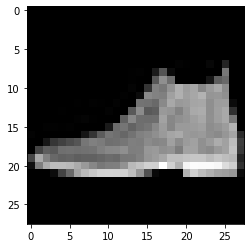

In [20]:
IMAGE_SIZE = 28
show_data(test_set[0])

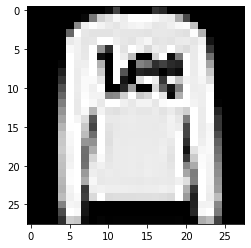

In [21]:
show_data(test_set[1])

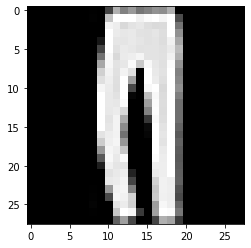

In [22]:
show_data(test_set[2])

2. Use the plots provided in the lab to plot the Cost and accuracy. For the most part the cost should decrease and the accuracy should increase. The accuracy should be above 85% . 

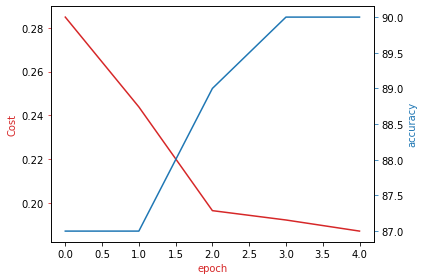

In [10]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot(acc_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()